<h1>Импорт библиотек

In [33]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [58]:
def sum_prod(X, V):
    p = len(X)
    n = X[0].shape[1]
    sum_matrix = np.zeros((n, ), dtype=int)
    for i in range(0, p):
        sum_matrix += np.matmul(X[i], V[i])
    return sum_matrix

def test_task_1(X, V, sum_matrix):
    return np.array_equal(sum_prod(X, V), sum_matrix)

def test_1():
    X = [np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]]), np.array([[5, 6, 1], [7, 8, 2], [1, 4, 3]])]
    V = [np.array([1, 2, 3]), np.array([3, 4, 6])]
    sum_matrix = np.array([59, 91, 75])
    return test_task_1(X, V, sum_matrix)

print(test_1())

True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [17]:
def binarize(M, threshold=0.5): 
    return np.where(M <= threshold, 0, 1) 

def test_task_2(M, binarized_matrix): 
    return np.array_equal(binarize(M), binarized_matrix) 

def test_binarized(): 
    M = np.array([[0.2, 0.6, 0.4], [0.8, 0.3, 0.7]])
    binarized_matrix = np.array([[0, 1, 0], [1, 0, 1]])
    return test_task_2(M, binarized_matrix)

test_binarized()

True

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [20]:
def get_unique_elements(mat): 
    unique_elements = {} 
    for i, axis in enumerate(mat): 
        unique_elements[str(i)] = np.unique(axis) 
    return unique_elements 

def unique_rows(mat): 
    return get_unique_elements(mat) 
 
def unique_columns(mat): 
    return get_unique_elements(mat.T) 
 
def test_task_3(mat, result, unique): 
    for key, value in result.items(): 
        if not np.array_equal(value, unique[key]): 
            return False 
    return True 
 
def test_1(): 
    mat = np.array([[1, 2, 3], [3, 3, 3], [4, 5, 6]]) 
    return test_task_3(mat, unique_rows(mat), {'0': [1, 2, 3], '1': [3], '2': [4, 5, 6]})
 
def test_2(): 
    mat = np.array([[1, 2, 2], [3, 2, 3], [3, 2, 6]]) 
    return test_task_3(mat, unique_columns(mat), {'0': [1, 3], '1': [2], '2': [2, 3, 6]}) 
 
print(test_1()) 
print(test_2())

True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

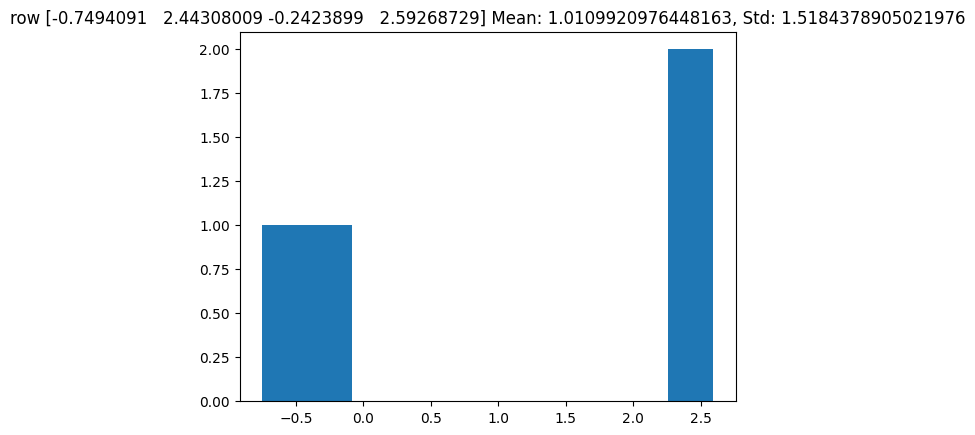

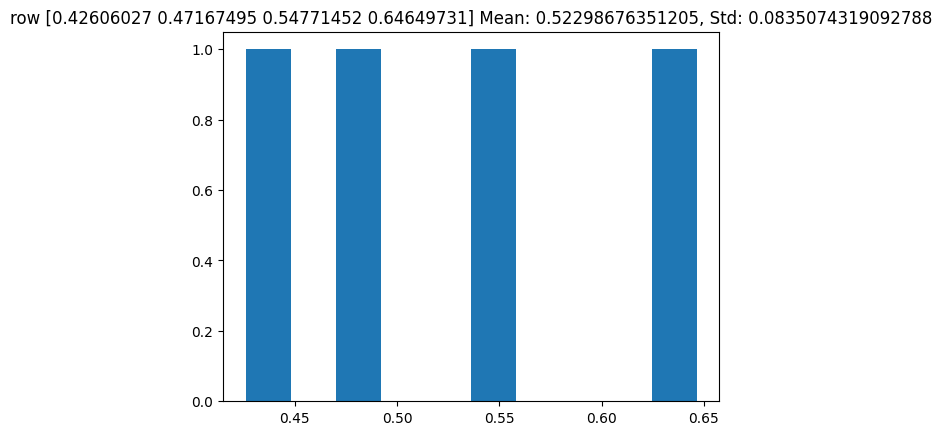

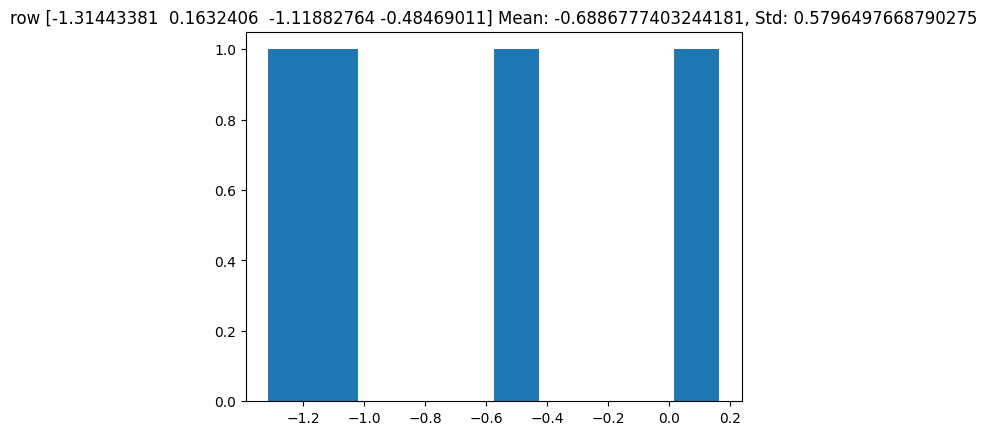

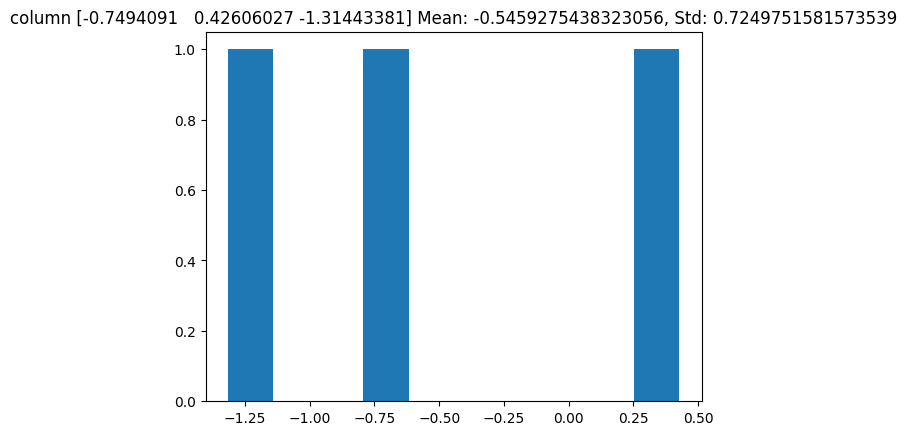

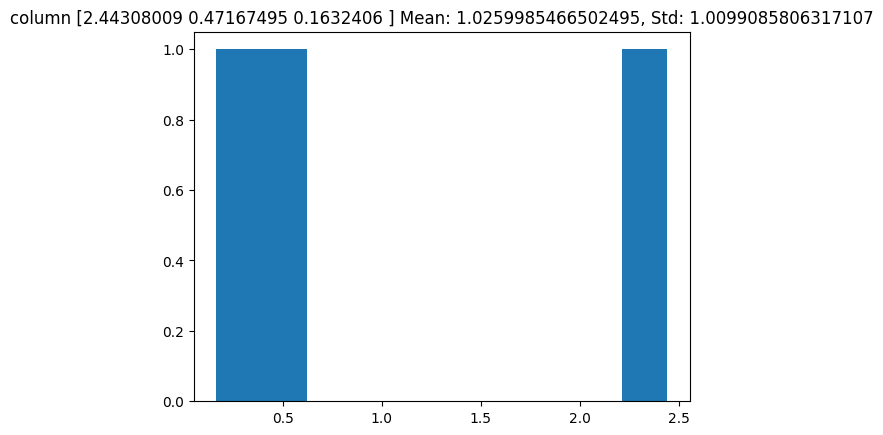

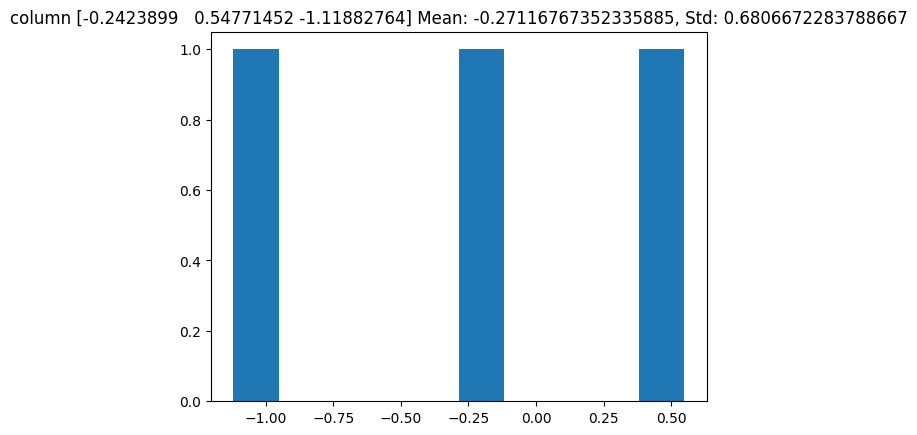

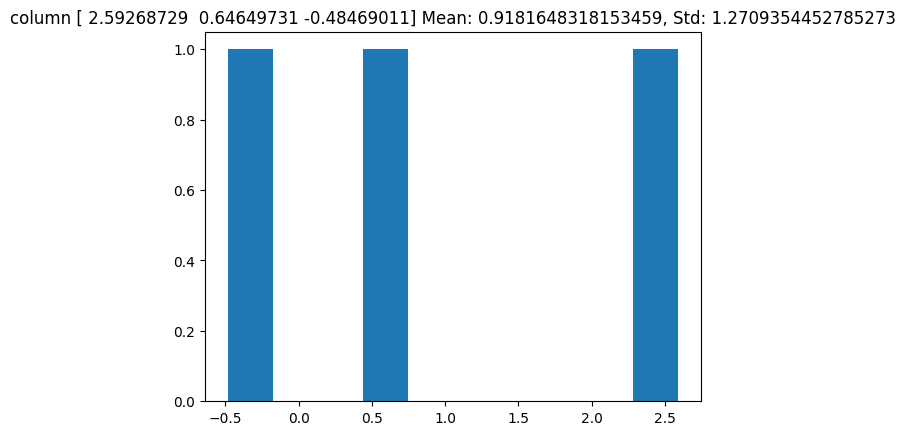

In [39]:
def show_matrix_random_normal_info(m, n):
    random = np.random.default_rng()
    matrix = random.normal(size=(m, n))
    show_axis_info(matrix, 'row')
    show_axis_info(matrix.T, 'column')

def show_axis_info(matrix, axis_type):
    for axis in matrix:
        mean = np.mean(axis)
        std = np.std(axis)
        plt.hist(axis)
        plt.title(f'{axis_type} {axis} Mean: {mean}, Std: {std}')
        plt.show()

show_matrix_random_normal_info(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [59]:
def chess(m, n, a, b): 
    matrix = np.zeros((m, n), dtype=int) 
    for row in range(m): 
        for col in range(n): 
            if (row + col) % 2 == 0: 
                matrix[row][col] = a 
            else: 
                matrix[row][col] = b 
    return matrix 
 
def test_generate_chess_board(m, n, a, b, required_matrix): 
    return np.array_equal(chess(m, n, a, b), required_matrix) 
 
def test_1_():  
    return test_generate_chess_board(1, 1, 3, 4, [[3]])

def test_2():  
    return test_generate_chess_board(1, 2, 3, 4, [[3, 4]])

def test_3():  
    return test_generate_chess_board(5, 4, 3, 4, [[3, 4, 3, 4], [4, 3, 4, 3], [3, 4, 3, 4], [4, 3, 4, 3], [3, 4, 3, 4]])
 
print(test_1()) 
print(test_2()) 
print(test_3())

True
True
True


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

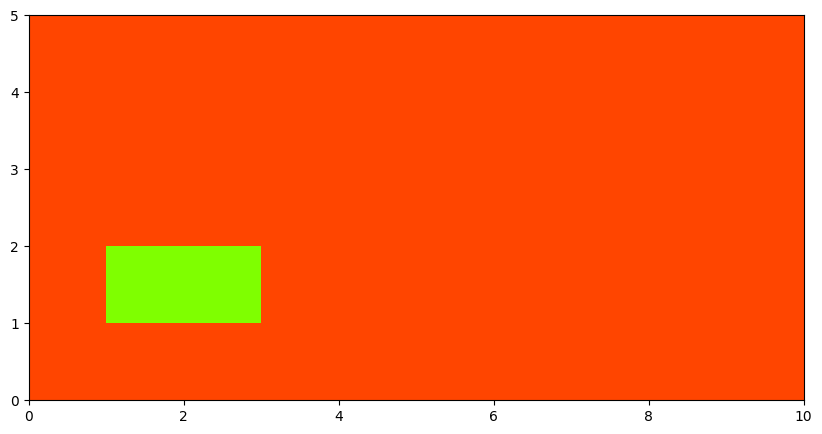

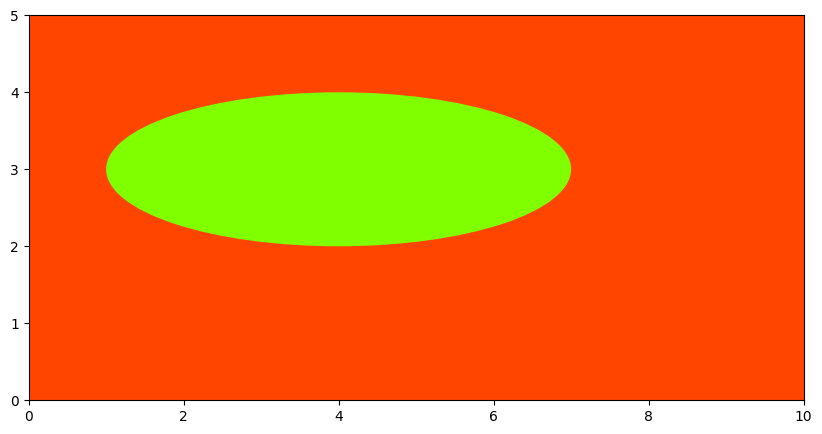

In [50]:
from matplotlib.patches import Rectangle, Ellipse
import matplotlib.pyplot as plt

def draw_shape(shape, params, m, n, shape_color, background_color):
    ax = set_plot_area(m, n, background_color)
    if shape == "rectangle":
        if (params['x'] + params['width'] > m or params['x'] < 0 or params['y'] + params['height'] > n or params['y'] < 0):
            raise Exception("Out of image bounds!")
        ax.add_patch(Rectangle((params['x'], params['y']), params['width'], params['height'], facecolor=shape_color, fill=True))
    elif shape == "ellipse":
        if (params['center_x'] + params['a'] > m or params['center_x'] - params['a'] < 0 or params['center_y'] + params['b'] > n or params['center_y'] - params['b'] < 0):
            raise Exception("Out of image bounds!")
        ax.add_patch(Ellipse((params['center_x'], params['center_y']), 2*params['a'], 2*params['b'], facecolor=shape_color, fill=True))

def set_plot_area(m, n, background_color):
    fig, ax = plt.subplots()
    ax.set_xlim([0, m])
    ax.set_ylim([0, n])
    
    fig.set_figwidth(m)
    fig.set_figheight(n)
    
    ax.set_facecolor(background_color)
    return ax

draw_shape("rectangle", {'x': 1, 'y': 1, 'width': 2, 'height': 1}, 10, 5, '#7FFF00', '#FF4500')
draw_shape("ellipse", {'center_x': 4, 'center_y': 3, 'a': 3, 'b': 1}, 10, 5, '#7FFF00', '#FF4500')

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [54]:
from math import sqrt  

def get_time_series_info(array, p):  
    expectation = np.mean(array)  
    dispersion = np.std(array)  
    mse = sqrt(dispersion)  
    (local_mins, local_maxs) = get_local_extremums(array)  
    moving_average_series = get_moving_average_series(array, p)  
    return (expectation, dispersion, mse, local_mins, local_maxs, moving_average_series)  

def get_local_extremums(array):   
    local_maxs =[]   
    local_mins = []   
    for i in range(1, len(array) - 1):   
        if array[i] > array[i - 1] and array[i] > array[i + 1]:   
            local_maxs.append(array[i])   
        if array[i] < array[i - 1] and array[i] < array[i + 1]:   
            local_mins.append(array[i])   
    return (local_mins, local_maxs)  

def get_moving_average_series(array, p):    
    moving_average_array = np.convolve(array, np.ones(p), 'valid') / p
    return moving_average_array  

result = get_time_series_info(np.array([1,2,3,4,5,4,3,2,1,2,3,2,1,2,3,4,5,6,5,4,3,2,1]), 10)
print(result)

(2.9565217391304346, 1.4288414543613028, 1.195341563889294, [1, 1], [5, 3, 6], array([2.7, 2.9, 2.9, 2.7, 2.5, 2.3, 2.3, 2.5, 2.9, 3.3, 3.5, 3.5, 3.5,
       3.5]))


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [48]:
def one_hot_encode(vector): 
    max_label = max(vector) 
    result_encoding = [] 
    for label in vector: 
        label_encoding = [0] * (max_label + 1) 
        label_encoding[label - 1] = 1  # Adjusted index by subtracting 1
        result_encoding.append(label_encoding) 
    return result_encoding 
         
def test_task_8(): 
    labels = [1, 3, 3, 2, 2, 1] 
    encoding = [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]] 
    return encoding == one_hot_encode(labels) 
 
test_task_8()

True